In [3]:
import pandas as pd                    # For data frame manipulations
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline 
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")      # Not showing any warnings with in the Jupyter notebook

In [4]:
import pandas as pd
import numpy as np
df=pd.read_csv("/Users/saketh/Desktop/data.csv")
pd.set_option("display.max_rows", None)
print(df)

       Unnamed: 0    X1    X2    X3    X4    X5    X6    X7    X8    X9  ...  \
0      X21.V1.791   135   190   229   223   192   125    55    -9   -33  ...   
1      X15.V1.924   386   382   356   331   320   315   307   272   244  ...   
2         X8.V1.1   -32   -39   -47   -37   -32   -36   -57   -73   -85  ...   
3       X16.V1.60  -105  -101   -96   -92   -89   -95  -102  -100   -87  ...   
4       X20.V1.54    -9   -65   -98  -102   -78   -48   -16     0   -21  ...   
5       X14.V1.56    55    28    18    16    16    19    25    40    52  ...   
6       X3.V1.191   -55    -9    52   111   135   129   103    72    37  ...   
7      X11.V1.273     1    -2    -8   -11   -12   -17   -15   -16   -18  ...   
8      X19.V1.874  -278  -246  -215  -191  -177  -167  -157  -139  -118  ...   
9       X3.V1.491     8    15    13     3    -6    -8    -5     4    25  ...   
10        X3.V1.6    -5    15    28    28     9   -29   -41   -19    14  ...   
11     X21.V1.724  -167  -230  -280  -31

In [5]:
print("General info about colums,rows etc.")
df.info()
print("\nTarget variables value counts\n",df["y"].value_counts())

General info about colums,rows etc.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed: 0 to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB

Target variables value counts
 y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64


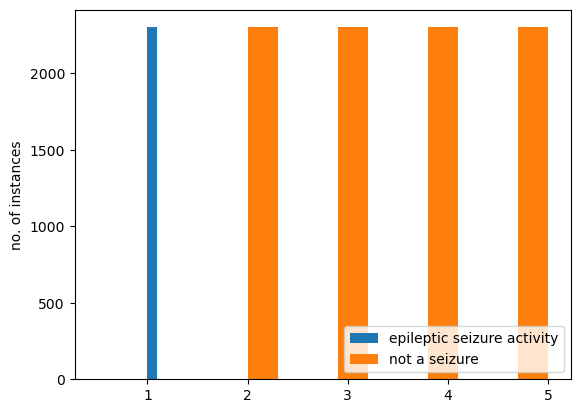

In [6]:
import matplotlib.pyplot as plt
def hist(df,plt):
  plt.hist(df[df["y"]==1]["y"],label="epileptic seizure activity")
  plt.hist(df[df["y"]!=1]["y"],label="not a seizure")
  plt.legend(loc='lower right')
  plt.ylabel('no. of instances')
  plt.show()


hist(df,plt)

In [7]:
df["Unnamed: 0"].value_counts #As you can see this column is exlusive for all instance
                              #So it means, the column has no effect on classification, it is unnecessary

<bound method IndexOpsMixin.value_counts of 0        X21.V1.791
1        X15.V1.924
2           X8.V1.1
3         X16.V1.60
4         X20.V1.54
5         X14.V1.56
6         X3.V1.191
7        X11.V1.273
8        X19.V1.874
9         X3.V1.491
10          X3.V1.6
11       X21.V1.724
12        X7.V1.162
13        X1.V1.211
14        X1.V1.615
15       X22.V1.242
16        X1.V1.863
17        X9.V1.302
18        X7.V1.541
19        X9.V1.915
20       X23.V1.964
21        X1.V1.614
22       X11.V1.134
23       X18.V1.544
24       X19.V1.294
25       X21.V1.802
26         X2.V1.72
27        X3.V1.744
28       X12.V1.733
29        X8.V1.614
30       X20.V1.374
31        X2.V1.514
32        X8.V1.451
33        X18.V1.40
34          X5.V1.8
35       X10.V1.492
36        X5.V1.741
37        X5.V1.202
38        X23.V1.74
39       X23.V1.332
40        X15.V1.80
41       X11.V1.123
42       X18.V1.916
43        X2.V1.401
44       X22.V1.572
45       X23.V1.423
46       X23.V1.281
47       X13.V1.

In [8]:
df["y"].value_counts()

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64

**We remove the unwanted column**

In [9]:
df1=df.drop(columns=df.columns[0])
pd.set_option("display.max_rows", None)
print(df1)

         X1    X2    X3    X4    X5    X6    X7    X8    X9   X10  ...  X170  \
0       135   190   229   223   192   125    55    -9   -33   -38  ...   -17   
1       386   382   356   331   320   315   307   272   244   232  ...   164   
2       -32   -39   -47   -37   -32   -36   -57   -73   -85   -94  ...    57   
3      -105  -101   -96   -92   -89   -95  -102  -100   -87   -79  ...   -82   
4        -9   -65   -98  -102   -78   -48   -16     0   -21   -59  ...     4   
5        55    28    18    16    16    19    25    40    52    66  ...   -12   
6       -55    -9    52   111   135   129   103    72    37     0  ...  -125   
7         1    -2    -8   -11   -12   -17   -15   -16   -18   -17  ...   -79   
8      -278  -246  -215  -191  -177  -167  -157  -139  -118   -92  ...  -400   
9         8    15    13     3    -6    -8    -5     4    25    41  ...    49   
10       -5    15    28    28     9   -29   -41   -19    14    30  ...   -38   
11     -167  -230  -280  -315  -338  -36

**We transform 2,3,4,5 classes to 0, 1 class to 1**

In [10]:
target = df1.y
target[target > 1] = 0
df1.head()

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  X172  \
0  135  190  229  223  192  125   55   -9  -33  -38  ...   -17   -15   -31   
1  386  382  356  331  320  315  307  272  244  232  ...   164   150   146   
2  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    57    64    48   
3 -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -82   -81   -80   
4   -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...     4     2   -12   

   X173  X174  X175  X176  X177  X178  y  
0   -77  -103  -127  -116   -83   -51  0  
1   152   157   156   154   143   129  1  
2    19   -12   -30   -35   -35   -36  0  
3   -77   -85   -77   -72   -69   -65  0  
4   -32   -41   -65   -83   -89   -73  0  

[5 rows x 179 columns]

**Data transformation with hurst exponent and discrete wavelet transform**

In [11]:
pip install hurst

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install PyWavelets

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pywt #importing pywt for getting wavelet transform features
from hurst import compute_Hc

In [14]:
def getHurst(df1):
  df1["hurst_ex"]=[compute_Hc(df1.iloc[i], kind="change", simplified=True)[0] for i in range(len(df1))]
  df1["hurst_c"]=[compute_Hc(df1.iloc[i], kind="change", simplified=True)[1] for i in range(len(df1))]
  return df1


def getStatsForHurst(df1):
  plt.scatter(df1["hurst_ex"],target)
  print("mean value of hurst exponent for class 1:",np.mean(df1.iloc[target[target==1].index]["hurst_ex"]))
  print("mean value of hurst exponent for class 0:",np.mean(df1.iloc[target[target==0].index]["hurst_ex"]))
  print("mean value of hurst constant for class 1:",np.mean(df1.iloc[target[target==1].index]["hurst_c"]))
  print("mean value of hurst constant for class 0:",np.mean(df1.iloc[target[target==0].index]["hurst_c"]))
  print("median value of hurst exponent for class 1:",np.median(df1.iloc[target[target==1].index]["hurst_ex"]))
  print("median value of hurst exponent for class 0:",np.median(df1.iloc[target[target==0].index]["hurst_ex"]))
  print("median value of hurst constant for class 1:",np.median(df1.iloc[target[target==1].index]["hurst_c"]))
  print("median value of hurst constant for class 0:",np.median(df1.iloc[target[target==0].index]["hurst_c"]))

In [15]:

def getWaveletFeatures(data,target):
    list_features = []
    for signal in range(len(data)):
        list_coeff = pywt.wavedec(data.iloc[signal], "db4")
        features = []
        features.append(data.iloc[signal]["hurst_ex"])
        features.append(data.iloc[signal]["hurst_c"])
        for coeff in list_coeff:
            features += statisticsForWavelet(coeff)
        list_features.append(features)
    return createDfWavelet(list_features,target)
#This method taken from [9]
def statisticsForWavelet(coefs):
    n5 = np.nanpercentile(coefs, 5)
    n25 = np.nanpercentile(coefs, 25)
    n75 = np.nanpercentile(coefs, 75)
    n95 = np.nanpercentile(coefs, 95)
    median = np.nanpercentile(coefs, 50)
    mean = np.nanmean(coefs)
    std = np.nanstd(coefs)
    var = np.nanvar(coefs)
    rms = np.nanmean(np.sqrt(coefs**2))
    return [n5, n25, n75, n95, median, mean, std, var, rms]

def createDfWavelet(data,target):
  for i in range(len(data)):
    data[i].append(target[i])
  return pd.DataFrame(data) 

mean value of hurst exponent for class 1: 0.19722822350703667
mean value of hurst exponent for class 0: 0.5160753908505222
mean value of hurst constant for class 1: 21.666988067003334
mean value of hurst constant for class 0: 9.445640952454644
median value of hurst exponent for class 1: 0.18869720999866688
median value of hurst exponent for class 0: 0.5211514082666515
median value of hurst constant for class 1: 10.024556108007058
median value of hurst constant for class 0: 5.13364453556763


X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X172  X173  X174  \
0  135  190  229  223  192  125   55   -9  -33  -38  ...   -31   -77  -103   
1  386  382  356  331  320  315  307  272  244  232  ...   146   152   157   
2  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    48    19   -12   
3 -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -80   -77   -85   
4   -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...   -12   -32   -41   

   X175  X176  X177  X178  y  hurst_ex    hurst_c  
0  -127  -116   -83   -51  0  0.558289   2.639291  
1   156   154   143   129  1 -0.198679  72.702377  
2   -30   -35   -35   -36  0  0.749217   3.457187  
3   -77   -72   -69   -65  0  0.779146  11.983561  
4   -65   -83   -89   -73  0  0.621978   2.549678  

[5 rows x 181 columns]

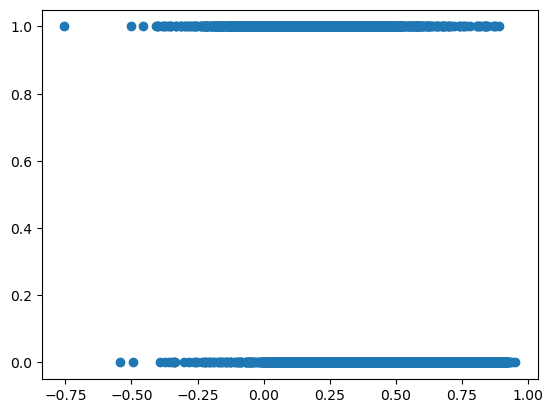

In [16]:
df1=getHurst(df1)
getStatsForHurst(df1)
df1.head()

In [17]:
df1_fea=getWaveletFeatures(df1,target)

In [18]:
df1_fea.head()#our new dataset is ready

0          1            2           3            4            5   \
0  0.558289   2.639291  -308.299401 -151.216527   723.449162   776.917001   
1 -0.198679  72.702377 -1242.996307 -488.612159  1410.560129  1774.820173   
2  0.749217   3.457187  -309.409139 -210.090841  -117.128242    -3.197720   
3  0.779146  11.983561  -392.667105 -384.158663  -274.167224  -158.602710   
4  0.621978   2.549678  -276.585954 -255.283369    12.713043    92.977333   

           6           7            8             9   ...         38  \
0    7.281575  185.673279   420.961831  1.772089e+05  ... -15.858685   
1  599.383780  504.747903  1218.647761  1.485102e+06  ... -39.440931   
2 -153.466544 -159.635662    95.480663  9.116557e+03  ...  -7.354442   
3 -295.930482 -292.206483   106.654199  1.137512e+04  ...  -5.060153   
4  -79.855665  -96.795548   139.487881  1.945687e+04  ...  -9.754492   

         39        40         41        42        43         44          45  \
0 -5.558773  5.772536  13.346173  0.048504 -0.210034   9.121751   83.206344   
1 -6.574785  4.870545  42.662344 -0.634462 -0.683798  30.900234  954.824490   
2 -3.472210  3.388624   6.927034 -0.256622 -0.249847   4.955513   24.557105   
3 -2.330815  2.307951   5.368949  0.230629  0.038440   5.344979   28.568803   
4 -3.206273  3.667923   9.537925  0.063130  0.177617   7.173130   51.453787   

          46  47  
0   7.212415   0  
1  15.101415   1  
2   3.826032   0  
3   3.161617   0  
4   4.891576   0  

[5 rows x 48 columns]

**Resampling data**

In [19]:
#pip install scikit-learn


In [20]:
from sklearn.utils import shuffle
def createBalancedDataset(data,random_state):
  X = shuffle(data,random_state=random_state)
  return X.sort_values(by=47, ascending=False).iloc[:11500].index

In [21]:
v=createBalancedDataset(df1_fea,47)

Text(0.5, 0, 'classes 0 and 1')

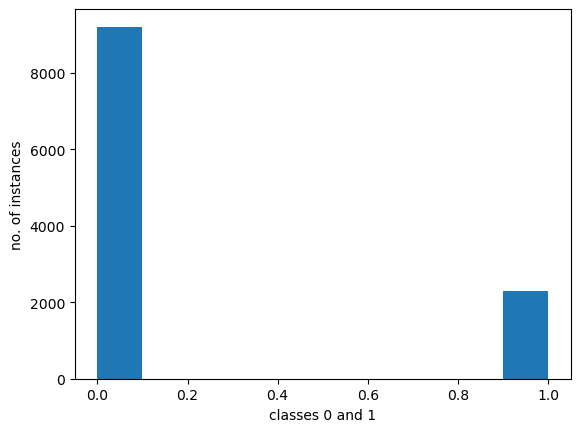

In [22]:
plt.hist((df1_fea.iloc[v])[47])
(df1_fea.iloc[v][47]).value_counts()
plt.ylabel('no. of instances')
plt.xlabel('classes 0 and 1')#more balanced dataset

In [23]:
#normalizing dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df1_fea.drop([47],axis=1))
n_df1_fea=pd.DataFrame(scaler.transform(df1_fea.drop([47],axis=1)))

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
X_trainr, X_testr, y_trainr, y_testr = train_test_split(n_df1_fea.iloc[v], target.iloc[v], test_size=0.33, random_state=47)

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
#Selection most important 20 feature by using Anova test
def selectFeature(X_trainr,y_trainr,X_testr):
  sel_f = SelectKBest(f_classif, k=20)
  X_train_f = sel_f.fit_transform(X_trainr, y_trainr)
  mySelectedFeatures=[i for i in range(len(sel_f.get_support())) if sel_f.get_support()[i]==True]
  j=0
  unseable_columns=[]
  #Creating a new dataset with these 20 features
  for i in X_trainr.columns:
    if(j not in mySelectedFeatures):
      unseable_columns.append(i)
    j+=1 
  X_train_arranged=X_trainr.drop(columns=unseable_columns)
  X_test_arranged=X_testr.drop(columns=unseable_columns)
  return  X_train_arranged,X_test_arranged

X_train_arranged,X_test_arranged=selectFeature(X_trainr,y_trainr,X_testr)

In [26]:
X_train_arranged.columns

Index([2, 5, 8, 10, 11, 12, 14, 17, 19, 20, 23, 26, 28, 29, 32, 35, 37, 38, 44,
       46],
      dtype='int64')

In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize and train the XGBoost model
model_xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', learning_rate=0.1, n_estimators=100)
model_xgboost.fit(X_trainr, y_trainr)

# Make predictions
y_pred_xgboost = model_xgboost.predict(X_testr)

# Evaluate the model
acc_xgboost = accuracy_score(y_testr, y_pred_xgboost)
prec_xgboost = precision_score(y_testr, y_pred_xgboost)
recall_xgboost = recall_score(y_testr, y_pred_xgboost)

print("\nXGBoost Results:")
print('Accuracy:', acc_xgboost)
print('Precision:', prec_xgboost)
print('Recall:', recall_xgboost)



XGBoost Results:
Accuracy: 0.9812911725955205
Precision: 0.9525691699604744
Recall: 0.9538258575197889


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize and train the Decision Tree model
model_tree = DecisionTreeClassifier()  # You can adjust parameters like max_depth, criterion, etc.
model_tree.fit(X_trainr, y_trainr)

# Make predictions
y_pred_tree = model_tree.predict(X_testr)

# Evaluate the model
acc_tree = accuracy_score(y_testr, y_pred_tree)
prec_tree = precision_score(y_testr, y_pred_tree, average='binary')  # Adjust `average` for multi-class problems
recall_tree = recall_score(y_testr, y_pred_tree, average='binary')  # Adjust `average` for multi-class problems

# Print results
print("\nDecision Tree Results:")
print('Accuracy:', acc_tree)
print('Precision:', prec_tree)
print('Recall:', recall_tree)



Decision Tree Results:
Accuracy: 0.9675889328063241
Precision: 0.9086229086229086
Recall: 0.9313984168865436


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize and train the Logistic Regression model
model_logistic = LogisticRegression(C=1.0, solver='liblinear')  # Adjust parameters as needed
model_logistic.fit(X_trainr, y_trainr)

# Make predictions
y_pred_logistic = model_logistic.predict(X_testr)

# Evaluate the model
acc_logistic = accuracy_score(y_testr, y_pred_logistic)
prec_logistic = precision_score(y_testr, y_pred_logistic)
recall_logistic = recall_score(y_testr, y_pred_logistic)

print("\nLogistic Regression Results:")
print('Accuracy:', acc_logistic)
print('Precision:', prec_logistic)
print('Recall:', recall_logistic)


Logistic Regression Results:
Accuracy: 0.9602108036890645
Precision: 0.9496296296296296
Recall: 0.8456464379947229


In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize and train the SVM model
model_svm = SVC(kernel='linear', C=10)  # Adjust kernel and C as needed
model_svm.fit(X_trainr, y_trainr)

# Make predictions
y_pred_svm = model_svm.predict(X_testr)

# Evaluate the model
acc_svm = accuracy_score(y_testr, y_pred_svm)
prec_svm = precision_score(y_testr, y_pred_svm, average='binary')  # Adjust `average` for multi-class problems
recall_svm = recall_score(y_testr, y_pred_svm, average='binary')  # Adjust `average` for multi-class problems

# Print results
print("\nSVM Results:")
print('Accuracy:', acc_svm)
print('Precision:', prec_svm)
print('Recall:', recall_svm)



SVM Results:
Accuracy: 0.9752305665349144
Precision: 0.953551912568306
Recall: 0.920844327176781



Model Performance Comparison:
                 Model  Accuracy  Precision    Recall
0              XGBoost  0.981291   0.952569  0.953826
1  Logistic Regression  0.960211   0.949630  0.845646
2        Decision Tree  0.967589   0.908623  0.931398
3                  SVM  0.975231   0.953552  0.920844


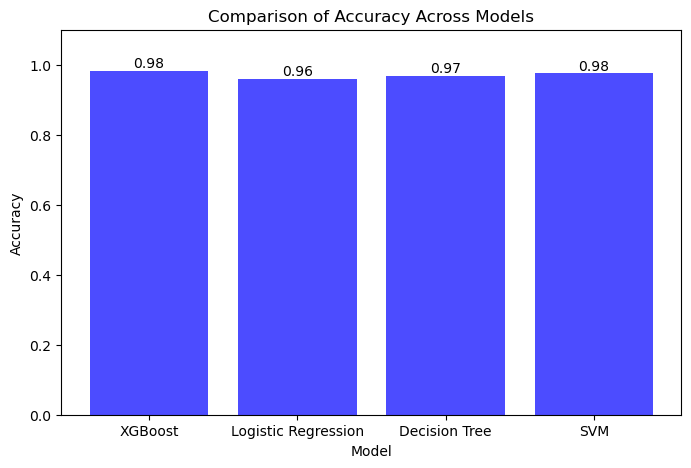

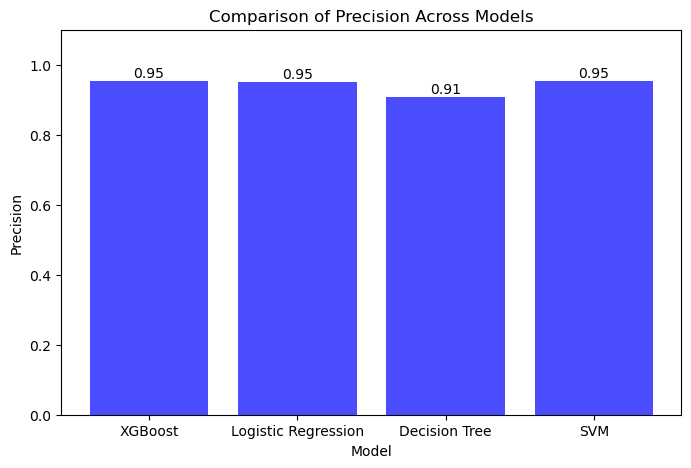

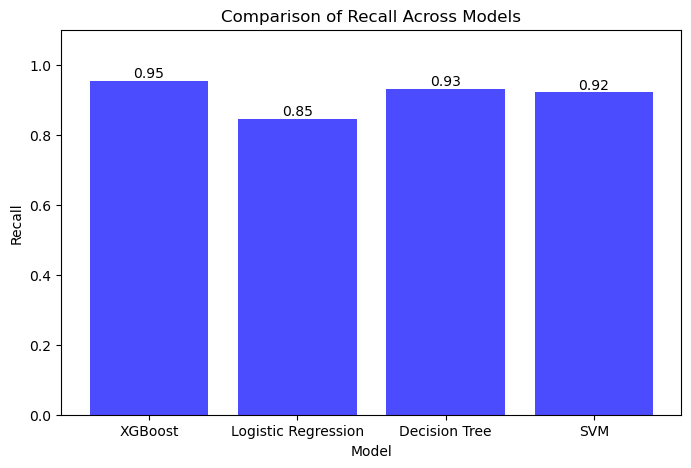

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Define results for the models (Replace with actual values)
model_results = {
    "Model": ["XGBoost", "Logistic Regression", "Decision Tree", "SVM"],
    "Accuracy": [acc_xgboost, acc_logistic, acc_tree, acc_svm],
    "Precision": [prec_xgboost, prec_logistic, prec_tree, prec_svm],
    "Recall": [recall_xgboost, recall_logistic, recall_tree, recall_svm]
}

# Create a DataFrame
results_df = pd.DataFrame(model_results)

# Display the table
print("\nModel Performance Comparison:")
print(results_df)

# Plot the metrics
metrics = ["Accuracy", "Precision", "Recall"]
for metric in metrics:
    plt.figure(figsize=(8, 5))
    plt.bar(results_df["Model"], results_df[metric], alpha=0.7, color='blue')
    for i, v in enumerate(results_df[metric]):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center')  # Add values on top of bars
    plt.title(f"Comparison of {metric} Across Models")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.ylim(0, 1.1)
    plt.show()
